In [13]:
from sklearn.metrics import r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [ ]:
X, y = load_boston(return_X_y= True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
kernel = ConstantKernel(constant_value=1) + ConstantKernel(1.0)*RBF(10) + WhiteKernel(5)

In [15]:
model = GaussianProcessRegressor(kernel=kernel)

In [16]:
model.fit(X = X_train, y=y_train)

/home/dulunche/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 + 1**2 * RBF(length_scale=10) + WhiteKernel(noise_level=5))

In [20]:
y_p_train, y_p_std_train = model.predict(X_train, return_std=True)

In [18]:
model.kernel

1**2 + 1**2 * RBF(length_scale=10) + WhiteKernel(noise_level=5)

In [19]:
import matplotlib.pyplot as plt

Text(0, 0.5, '$y$')

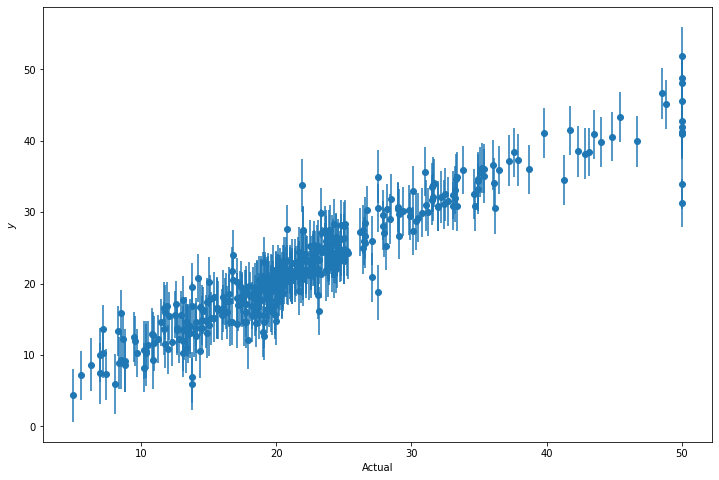

In [29]:
plt.figure(figsize=(12,8))
plt.errorbar(y_train, y_p_train, yerr=y_p_std_train, fmt='o')
plt.xlabel("Actual")
plt.ylabel(r"$y$")